In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

In [2]:
days = 365
gamma = 0.9
bank = 0
reward_rent = 10
reward_empty = 0
transfer_cost = 2
theta = 0.1
max_cars = 20

In [3]:
class Location():
    
    def __init__(self, name, cars, exp_out, exp_in):
        self.name = name
        self.cars = cars
        self.exp_out = exp_out
        self.exp_in = exp_in
        
    def move(self, location, cars):
        self.cars = self.cars-cars
        location.cars = np.clip(location.cars+cars, 1, 20)
        
    def rent(self, cars):
        self.cars = self.cars-min(self.cars, cars)
        return 10 * min(self.cars, cars)
    
    def restore(self, cars):
        self.cars = np.clip(self.cars+cars, 1, 20)
        
    def episode(self):
        return np.random.poisson(self.exp_in), np.random.poisson(self.exp_out)
    
    def rental_likelihood(self, x):
        return np.exp(-self.exp_out) * pow(self.exp_out, x) / np.math.factorial(x)
    
    def restore_likelihood(self, x):
        return np.exp(-self.exp_in) * pow(self.exp_in, x) / np.math.factorial(x)

In [4]:
# map (s,a) to (s')
def next_state(state, action):
    
    if action > 0:
        s1 = min(state[0] - min(np.abs(action), state[0]), max_cars+5)
        s2 = min(state[1] + min(np.abs(action), state[0]), max_cars+5)
        return tuple((s1,s2)), min(np.abs(action), state[0])
    elif action < 0:
        s1 = min(state[0] + min(np.abs(action), state[1]), max_cars+5)
        s2 = min(state[1] - min(np.abs(action), state[1]), max_cars+5)
        return tuple((s1,s2)), min(np.abs(action), state[1])
    else:
        return state, 0
    
def policy_evaluation():
    while True:
        delta = 0
        for state in tqdm(state_value.keys()):
            old = state_value[state]
            state_value[state] = expected_reward(state, policy[state])
            delta = max(delta, np.abs(old-state_value[state]))
        print(delta)
        if delta < theta:
            break
            
def policy_improvement():
    policy_stable = True
    for state in tqdm(state_value.keys()):
        old = policy[state]
        policy[state] = max(A, key=lambda x: expected_reward(state, x))
        if old != policy[state]:
            policy_stable = False
    return policy_stable
            
def expected_reward(state, action):
    newstate, moved = next_state(state, action)
    reward = 0
    sum_prob = 0
    for loc1_rentals in range(6):
        for loc2_rentals in range(6):
            for loc1_returns in range(6):
                for loc2_returns in range(6):
                    probability = (
                        loc1.rental_likelihood(loc1_rentals) *
                        loc2.rental_likelihood(loc2_rentals) *
                        loc1.restore_likelihood(loc1_returns) *
                        loc2.restore_likelihood(loc2_returns)
                    )                
                    loc1_cars = np.clip(newstate[0] - loc1_rentals + loc1_returns, 0, max_cars)
                    loc2_cars = np.clip(newstate[1] - loc2_rentals + loc2_returns, 0, max_cars)
                    reward += probability * (
                        -2 * np.abs(moved) + # moving penalty
                        10 * (min(loc1_rentals, newstate[0]) + min(loc2_rentals, newstate[1])) # rental reward
                        + state_value[(loc1_cars, loc2_cars)] # state-value of s'
                    )
                    
#                     part b first change
                    if action < 0:
                        reward += probability*2
                        
                    for cars in state:
                        if cars > 10:
                            reward += probability * -4
                            break
    return reward

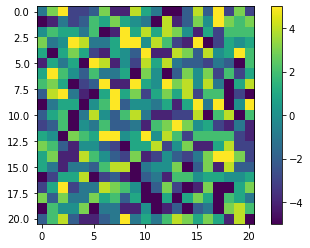

  0%|          | 2/441 [00:00<00:32, 13.33it/s]

69.73804535818273


  0%|          | 2/441 [00:00<00:32, 13.46it/s]

38.712433043887444


  0%|          | 2/441 [00:00<00:34, 12.78it/s]

15.332406485875119


  0%|          | 2/441 [00:00<00:33, 13.25it/s]

6.475325388722766


  0%|          | 2/441 [00:00<00:32, 13.36it/s]

2.7788871830133246


  0%|          | 2/441 [00:00<00:33, 12.92it/s]

1.241786846055163


  0%|          | 2/441 [00:00<00:35, 12.45it/s]

0.5805499773580038


  0%|          | 2/441 [00:00<00:33, 13.25it/s]

0.3104882594257532


  0%|          | 2/441 [00:00<00:32, 13.44it/s]

0.1635098747670476


  0%|          | 0/441 [00:00<?, ?it/s]

0.08518431891559075


100%|██████████| 441/441 [06:04<00:00,  1.21it/s]


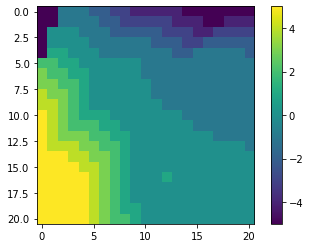

  0%|          | 2/441 [00:00<00:39, 11.08it/s]

42.64546006380527


  0%|          | 2/441 [00:00<00:33, 13.15it/s]

7.656711278435466


  0%|          | 2/441 [00:00<00:33, 13.04it/s]

3.7614747827674933


  0%|          | 2/441 [00:00<00:37, 11.62it/s]

1.7815731819055856


  0%|          | 2/441 [00:00<00:34, 12.60it/s]

0.8240000817101958


  0%|          | 2/441 [00:00<00:34, 12.67it/s]

0.3592290665032891


  0%|          | 2/441 [00:00<00:33, 13.29it/s]

0.14964288369154133


  0%|          | 0/441 [00:00<?, ?it/s]

0.06179612787328281


100%|██████████| 441/441 [06:11<00:00,  1.19it/s]


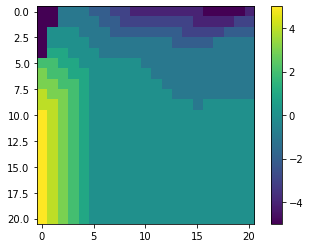

  0%|          | 2/441 [00:00<00:34, 12.89it/s]

3.334255940724134


  0%|          | 2/441 [00:00<00:32, 13.59it/s]

1.0070008620065636


  0%|          | 2/441 [00:00<00:35, 12.35it/s]

0.3090729544176867


  0%|          | 2/441 [00:00<00:34, 12.87it/s]

0.1116428868598831


  0%|          | 0/441 [00:00<?, ?it/s]

0.04221929230236299


100%|██████████| 441/441 [06:09<00:00,  1.19it/s]


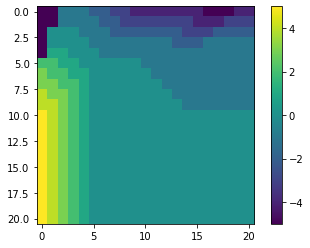

  0%|          | 0/441 [00:00<?, ?it/s]

0.038435089309075465


100%|██████████| 441/441 [06:09<00:00,  1.19it/s]


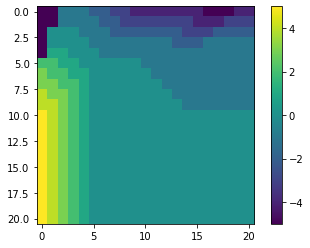

<Figure size 432x288 with 0 Axes>

In [5]:
# actions (- is loc2 --> loc1 and + is loc1 --> loc2)
A = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

# state-value function
state_value = {
    k:v for k,v in zip(
        ((first, second) for first in range(max_cars+1) for second in range(max_cars+1)), 
        np.random.rand((max_cars+1)**2)
    )
}

# policy
policy = {
    k:v for k,v in zip(
        ((first, second) for first in range(max_cars+1) for second in range(max_cars+1)), 
        (np.random.choice(A) for choice in range((max_cars+1)**2))
    )
}

loc1 = Location("San Diego", 20, 3, 3)
loc2 = Location("New York", 20, 4, 2)

plt.imshow(np.array(list(policy.values())).reshape(max_cars+1,max_cars+1))
plt.colorbar()
plt.show()
plt.clf()

for day in range(days):
    policy_evaluation()
    stable = policy_improvement()
    plt.imshow(np.array(list(policy.values())).reshape(max_cars+1,max_cars+1))
    plt.colorbar()
    plt.show()
    plt.clf()
    if stable:
        break

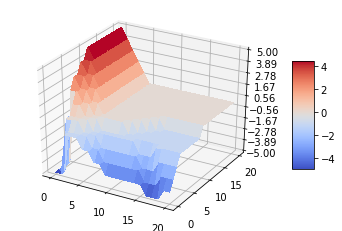

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 21, 1)
Y = np.arange(0, 21, 1)
X, Y = np.meshgrid(X, Y)
Z = np.array(list(policy.values())).reshape(max_cars+1,max_cars+1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-5, 5)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()